In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import utils

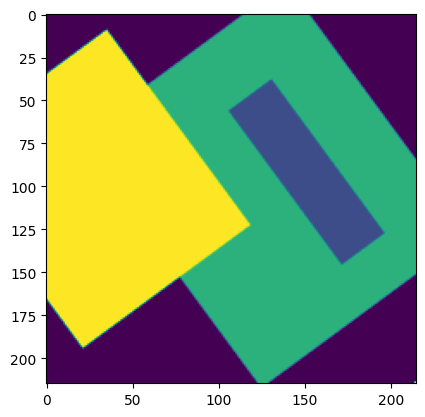

In [24]:
im = cv2.imread("week06_data/TestIm1rot.png")
im = im.astype(float).mean(2)/255
plt.imshow(im)

6.3

In [25]:
def structureTensor(im, sigma, epsilon):
    I, Ix, Iy = utils.gaussianSmoothing(im, sigma)
    g, _ = utils.gaussian1DKernel(epsilon)
    a = cv2.sepFilter2D(Ix**2, -1, g, g)
    b = cv2.sepFilter2D(Iy**2, -1, g, g)
    c = cv2.sepFilter2D(Ix*Iy, -1, g, g)
    return a, b, c

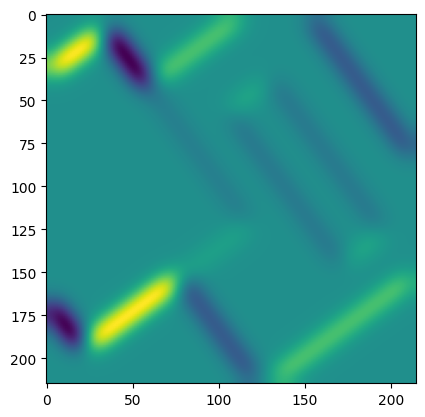

In [26]:
a, b, c = structureTensor(im, 5, 5) 
plt.imshow(c)

In [27]:
def harrisMeasure(im, sigma, epsilon, k):
    a, b, c = structureTensor(im, sigma, epsilon)
    r = a * b - c**2 - k * (a + b)**2
    return r

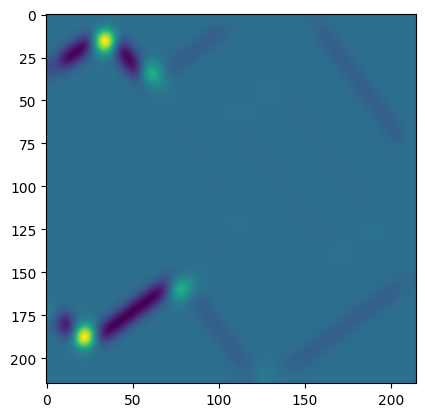

In [28]:
r = harrisMeasure(im, sigma=5, epsilon=5, k=0.06)
plt.imshow(r)

6.5

In [29]:
def cornerDetector(im, sigma, epsilon, k, tau):
    r = harrisMeasure(im, sigma, epsilon, k)
    corners_im = np.zeros_like(r)
    corners_im[r > tau * r.max()] = r[r > tau * r.max()]
    # compare right
    for i in range(corners_im.shape[0]):
        for j in range(corners_im.shape[1]-1):
            if corners_im[i,j] <= corners_im[i,j+1]: corners_im[i,j] = 0
    # compare left
    for i in range(corners_im.shape[0]):
        for j in range(1, corners_im.shape[1]):
            if corners_im[i,j] <= corners_im[i,j-1]: corners_im[i,j] = 0
    # compare down
    for i in range(corners_im.shape[0]-1):
        for j in range(corners_im.shape[1]):
            if corners_im[i,j] <= corners_im[i+1,j]: corners_im[i,j] = 0
    # compare up
    for i in range(1, corners_im.shape[0]):
        for j in range(corners_im.shape[1]):
            if corners_im[i,j] <= corners_im[i,j-1]: corners_im[i,j] = 0
    return np.asarray(np.where(corners_im > 0))

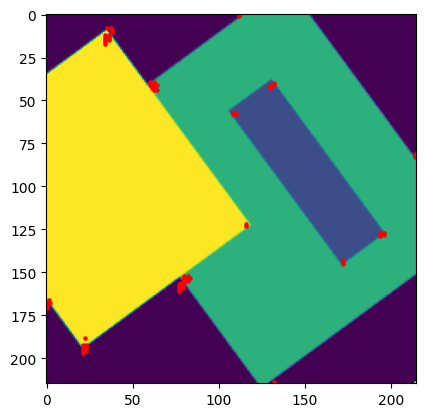

In [30]:
c = cornerDetector(im, sigma=2, epsilon=2, k=0.06, tau=0.01)
plt.imshow(im)
plt.scatter(c[1], c[0], marker='o', color='r', s=5)

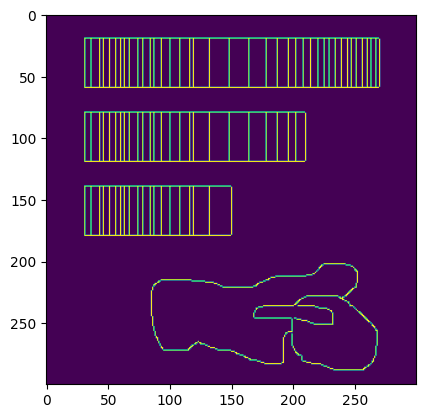

In [31]:
im = cv2.imread("week06_data/TestIm2.png")
e = cv2.Canny(im, 0.1, 0.3)
plt.imshow(e)